<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# **TP 1: SUBE-2023** 



### Participantes: Joaquín Koifman y Tobías Palacín Roitbarg

## Procesamiento de datos

In [129]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import json
import plotly.express as px

In [104]:
# Leer dataset y ver las primeras filas
datos_sube_2023 = pd.read_csv("sube-2023.csv")
datos_sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


#### **1. a)** Transformar la columna `DIA_TRANSPORTE` para que sea reconocida como una fecha.

In [105]:
sube_2023=datos_sube_2023.rename(columns={"DIA_TRANSPORTE" : "FECHA"}) # Renombrar la columna por comodidad
sube_2023['FECHA'] = pd.to_datetime(sube_2023['FECHA']) # Aplicar el cambio del tipo de dato sobre la columna correspondiente con la librería datetime
sube_2023['FECHA'].dtype # Corroboramos por consola que se trata del tipo M8, que es otra forma de llamarle al tipo datetime64

dtype('<M8[ns]')

#### **b)** Agregar tres columnas al DataFrame:
* `FECHA_DIA`
* `FECHA_ORDINAL`
* `FECHA_MES`

In [106]:
sube_2023["DIA_TRANSPORTE"] = sube_2023["FECHA"].dt.strftime('%a').str[:3]

sube_2023["FECHA_ORDINAL"] = sube_2023["FECHA"].dt.dayofyear

sube_2023["FECHA_MES"] = sube_2023["FECHA"].dt.strftime('%m')

sube_2023.head()


,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


#### **2.**  Crear el DataFrame `datos_amba`


In [118]:
datos_amba = sube_2023.loc[(sube_2023["AMBA"] == "SI") & (sube_2023["DATO_PRELIMINAR"]== "NO")] # Filtrar para obtener el DataFrame con las restricciones pedidas
datos_amba = datos_amba[["FECHA","DIA_TRANSPORTE","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD","TIPO_TRANSPORTE"]] # Quedarse con las columnas de interés
datos_amba = datos_amba.rename(columns={"CANTIDAD": "pasajeros","DIA_TRANSPORTE":"fecha_dia"}) # Renombrar columnas con nombres más descriptivos
datos_amba.columns = datos_amba.columns.str.lower() # Aplicar .lower() a todas las columnas para que sean iguales a las del DataFrame de salida
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


#### **3. a)** Identificar la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte



In [108]:
pasajeros_por_transporte = datos_amba.groupby("tipo_transporte")["pasajeros"].sum()

total_pasajeros = pasajeros_por_transporte.sum()

proporcion_pasajeros_por_transporte = pasajeros_por_transporte / total_pasajeros

print("Proporción de la cantidad total anual de pasajeros por tipo de transporte:")
print(proporcion_pasajeros_por_transporte)

Proporción de la cantidad total anual de pasajeros por tipo de transporte:
tipo_transporte
COLECTIVO    0.837645
SUBTE        0.068097
TREN         0.094258
Name: pasajeros, dtype: float64


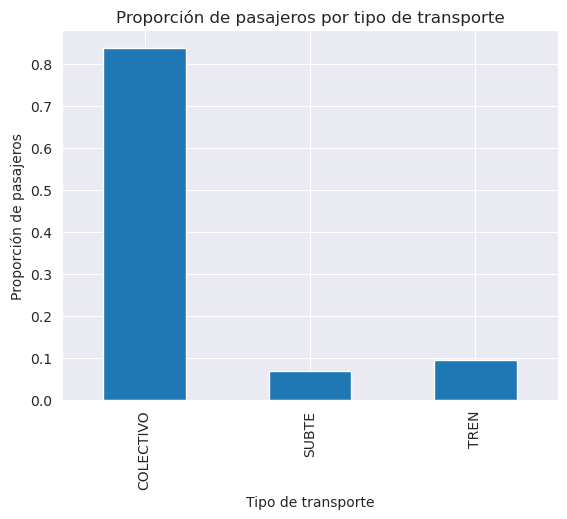

In [109]:
fig, ax = plt.subplots()

proporcion_pasajeros_por_transporte.plot(kind='bar', ax=ax)

ax.set_title('Proporción de pasajeros por tipo de transporte')
ax.set_xlabel('Tipo de transporte')
ax.set_ylabel('Proporción de pasajeros')

sns.set_style("darkgrid") 
plt.show()

**b)** Identificar la tupla `(mes, línea de subte)` donde viajó la mayor cantidad de pasajeros.

In [110]:
datos_subte = datos_amba.loc[datos_amba["tipo_transporte"] == "SUBTE",:]

pasajeros_por_mes_y_linea = datos_subte.groupby(["fecha_mes", "linea"])["pasajeros"].sum()

mayor_cantidad_pasajeros = pasajeros_por_mes_y_linea.idxmax()

print("La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es:", mayor_cantidad_pasajeros)

La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es: ('08', 'LINEA_B')


**c)** Identificar el día hábil con menos concurrencia en el transporte público.

In [111]:
dias_habiles = datos_amba.loc[(datos_amba["fecha_dia"] != "Sun") & (datos_amba["fecha_dia"] != "Sat"),:]

pasajeros_por_dia = dias_habiles.groupby("fecha_dia")["pasajeros"].std()

dia_con_menor_concurrencia = pasajeros_por_dia.idxmin()

cantidad_de_pasajeros = dias_habiles[dias_habiles["fecha_dia"] == dia_con_menor_concurrencia]["pasajeros"].sum()

print("El dia habil con menos concurencia en el transporte publico es", dia_con_menor_concurrencia, "con", cantidad_de_pasajeros, "pasajeros")

El dia habil con menos concurencia en el transporte publico es Mon con 540161948 pasajeros


Text(0, 0.5, 'Cantidad de pasajeros')

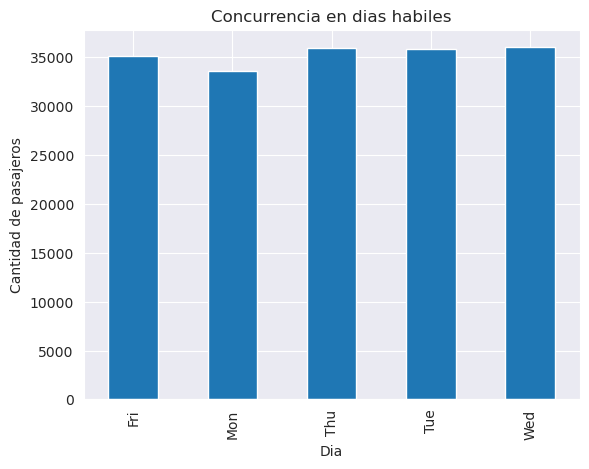

In [112]:
fig, ax = plt.subplots()

pasajeros_por_dia.plot(kind='bar', ax=ax)

ax.set_title('Concurrencia en dias habiles')
ax.set_xlabel('Dia')
ax.set_ylabel('Cantidad de pasajeros')

# Análisis Exploratorio

## **4**


/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

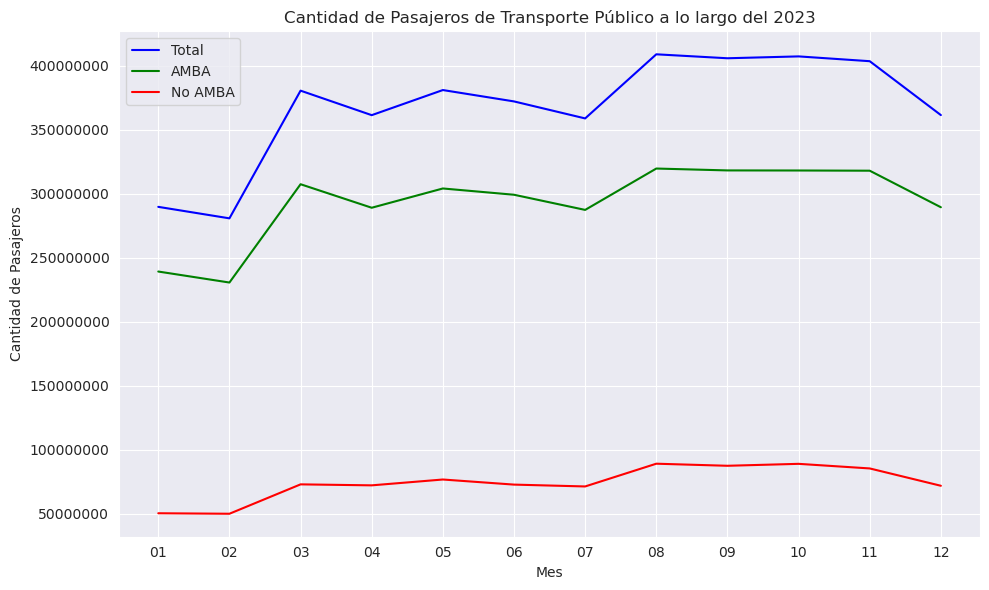

In [113]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=sube_2023.groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='Total', color='blue')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="SI"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='AMBA', color='green')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="NO"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='No AMBA', color='red')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pasajeros')
plt.legend()

plt.ticklabel_format(style='plain', axis='y')  
plt.tight_layout()
plt.show()


/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

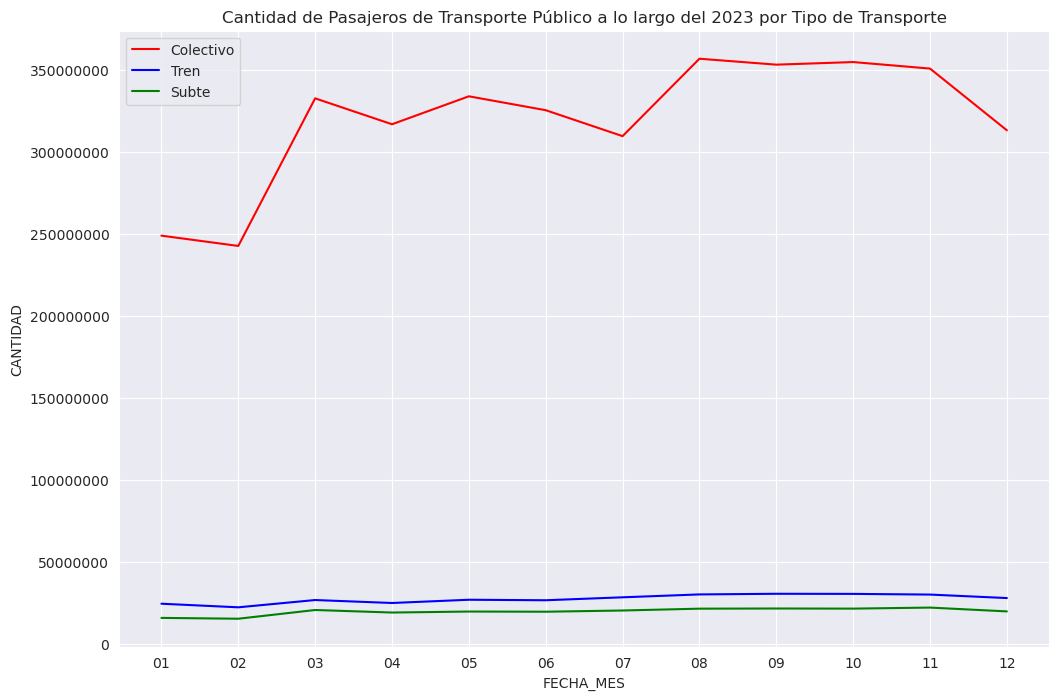

In [114]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='red', label='Colectivo')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'TREN'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='blue', label='Tren')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'SUBTE'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='green', label='Subte')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 por Tipo de Transporte')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

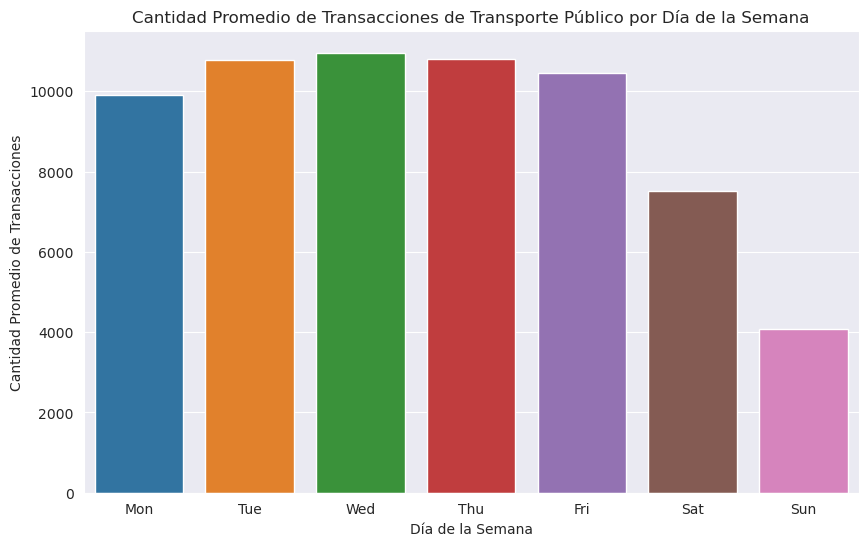

In [115]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sube_2023.groupby("DIA_TRANSPORTE")["CANTIDAD"].mean().reset_index(), x='DIA_TRANSPORTE', y='CANTIDAD',order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Cantidad Promedio de Transacciones de Transporte Público por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Transacciones')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

In [132]:
with open ("./ProvinciasArgentina.geojson") as f:
    data = json.load(f)

data_mapa = sube_2023
data_mapa["PROVINCIA"]=data_mapa["PROVINCIA"].replace({
    'SANTIAGO DEL ESTERO': 'Santiago del Estero',
    'TIERRA DEL FUEGO': 'Tierra del Fuego',
    'CAPITAL FEDERAL': 'Capital Federal',
    'BUENOS AIRES': 'Buenos Aires',
    'JN': 'Jujuy',  
    'CHUBUT': 'Chubut',
    'SANTA FE': 'Santa Fe',
    'ENTRE RÍOS': 'Entre Ríos',
    'LA PAMPA': 'La Pampa',
    'MENDOZA': 'Mendoza',
    'RÍO NEGRO': 'Río Negro',
    'CHACO': 'Chaco',
    'NEUQUÉN': 'Neuquén',
    'FORMOSA': 'Formosa',
    'CORRIENTES': 'Corrientes',
    'CATAMARCA': 'Catamarca',
    'SAN JUAN': 'San Juan',
    'SAN LUIS': 'San Luis',
    'CORDOBA': 'Córdoba',
    'SANTA CRUZ': 'Santa Cruz'
})

fig = px.choropleth_mapbox(data_mapa.groupby(['PROVINCIA'])['CANTIDAD'].sum().reset_index(), geojson=data,featureidkey='properties.nombre', locations='PROVINCIA', color='CANTIDAD',
                           color_continuous_scale="Viridis",
                           range_color=(10000000, 2000000000),
                           mapbox_style= "open-street-map" , # formatos de diseño del mapa : "carto-positron", "carto-positron",   "white-bg",
                           zoom=3, center = {"lat": -38.40, "lon": -63.60},
                           opacity=0.3,
                           labels={'promedio acessos por cada 100 hogares':'acceso a internet'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


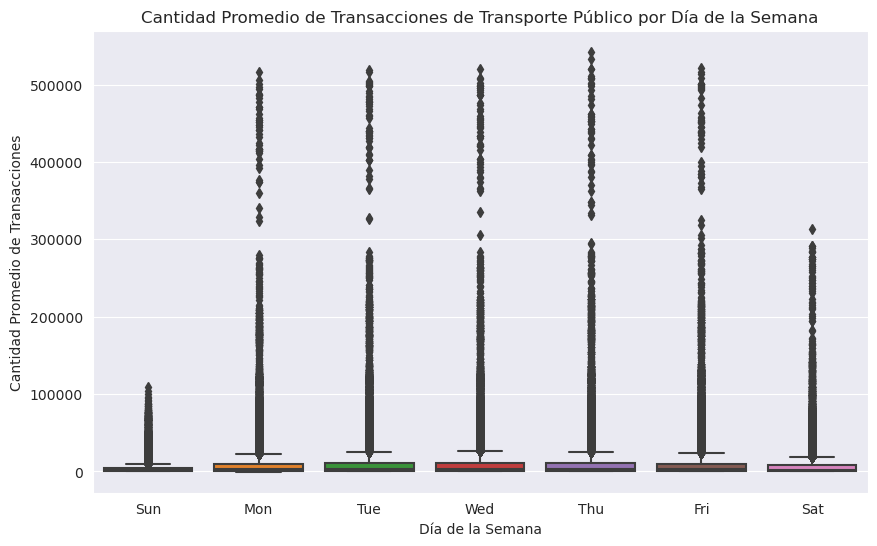

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=sube_2023, x='DIA_TRANSPORTE', y='CANTIDAD')

plt.title('Cantidad Promedio de Transacciones de Transporte Público por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Transacciones')

plt.show()

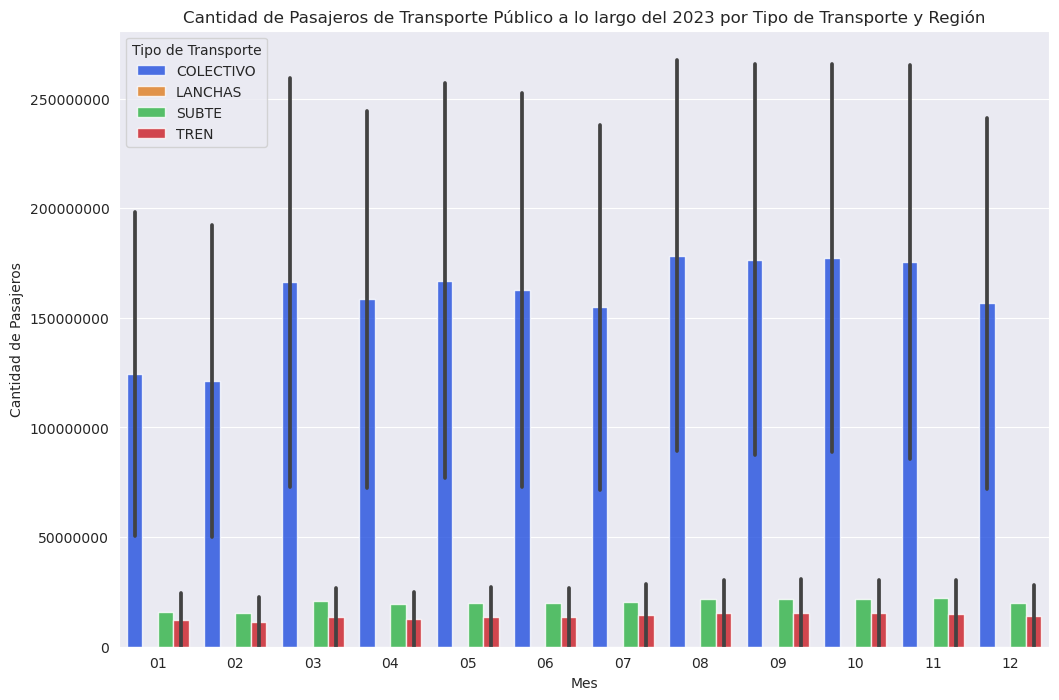

In [ ]:
plt.figure(figsize=(12, 8))

# Aplicar groupby con los filtros correspondientes
datos_agrupados = sube_2023.groupby(["FECHA_MES", "TIPO_TRANSPORTE", "AMBA"])["CANTIDAD"].sum().reset_index()

# Filtrar los datos por tipo de transporte y región y trazar los gráficos de barras
sns.set_style("")  # Cambiar el estilo del gráfico
sns.barplot(data=datos_agrupados, x='FECHA_MES', y='CANTIDAD', hue='TIPO_TRANSPORTE',
            palette='bright', alpha=0.8)  # Usar el parámetro hue para separar por tipo de transporte

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 por Tipo de Transporte y Región')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Tipo de Transporte')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

